## 2020-03-13
* The below notebook was adjusted from [COMBLE-MIP](https://arm-development.github.io/comble-mip/).
* It compares selected simulations against observational targets that were collected from satellite and ground-based retrievals.
* In case of questions or concerns, please notify [Ann Fridlind](mailto:ann.fridlind@nasa.gov) and [Florian Tornow](mailto:ft2544@columbia.edu).
* Please check out our [description of this case](https://nasa-giss.github.io/LES-SCM/notebooks/case_descr_20200313.html).

In [12]:
%run functions_plotting.py 
 
## select simulations to plot
sim_keyword = '20200313'  

In [13]:
## load ERA5 fields
era5_1d, era5_2d = load_era5(PATH='../data_files/')

## load radiosondes
rs_dat = load_rs(t_filter = 7.)

## load DOE ARM site statistics
kazrkollias_dat = load_kazrkollias(t_filter = 6.,aux_dat=rs_dat) ## here using radiosonde profiles to estimate CTT
kazrclough_dat = load_kazrclough(t_filter = 6.) 
aeri_dat = load_aeri(t_filter = 0.5)
radflux_dat = load_radflux(t_filter = 6.)
srfflux_dat = load_flux(t_filter = 6.)

## load CARRA surface fluxes
carra_dat = load_carraflux()

## load MAC-LWP
maclwp_dat = load_maclwp(t_filter = 0.) 

## load MODIS, VIIRS, and SENTINEL retrievals
modis_dat    = load_modis(t_filter = 0.,sza_filter = 65.)
viirs_dat    = load_viirs(t_filter = 0.,sza_filter = 65.)
sentinel_dat = load_sentinel(t_filter = 0.,sza_filter = 65.)

## load CERES retrievals
ceres_dat = load_ceres(t_filter = 0.)

## load CALIPSO retrievals (note the increased time window)
calipso_dat = load_calipso(t_filter = 3.)

../data_files/theta_temp_rh_sh_uvw_sst_along_trajectory_era5ml_28h_end_2020-03-13-18.nc
../data_files/anxsondewnpnM1.b1.20200313.052700.cdf
../data_files/anxsondewnpnM1.b1.20200313.232200.cdf
../data_files/anxsondewnpnM1.b1.20200313.112600.cdf
../data_files/anxsondewnpnM1.b1.20200313.172600.cdf
KAZR (Kollias): here using auxiliary field to estimate cloud-top temperature


/gpfsm/dhome/tflorian/LES-SCM/notebooks/functions_plotting.py:306: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff'] = np.abs(aux_dat['zf'] - np.float64(p_df['zi']))
/gpfsm/dhome/tflorian/LES-SCM/notebooks/functions_plotting.py:307: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff.25'] = np.abs(aux_dat['zf'] - np.float64(p_df['zi.25']))
/gpfsm/dhome/tflorian/LES-SCM/notebooks/functions_plotting.py:308: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff.75'] = np.abs(aux_dat['zf'] - np.float64(p_df['zi.75']))


In [14]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['hfss','hfls','ts'] # variables with ERA5 (longer time axis)
var_vec_2d = ['theta','qv','ua','va']
df_col_1d_les,df_col_2d_les = load_sims('../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,subfolder='s')
df_col_1d_scm,df_col_2d_scm = load_sims('../output_scm/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,subfolder='s')

Loading variables: f(time)
../output_les/dharma/comble_20200313_diagNa.nc
../output_les/dharma/comble_20200313_progNa.nc
Loading variables: f(time,height)
../output_les/dharma/comble_20200313_diagNa.nc
../output_les/dharma/comble_20200313_progNa.nc
Loading variables: f(time)
../output_scm/modele/comble_20200313_diagNa.nc
Loading variables: f(time,height)
../output_scm/modele/comble_20200313_diagNa.nc


/usr/local/other/anaconda/GEOSpyD/24.3.0-0/2024-08-29/envs/py3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


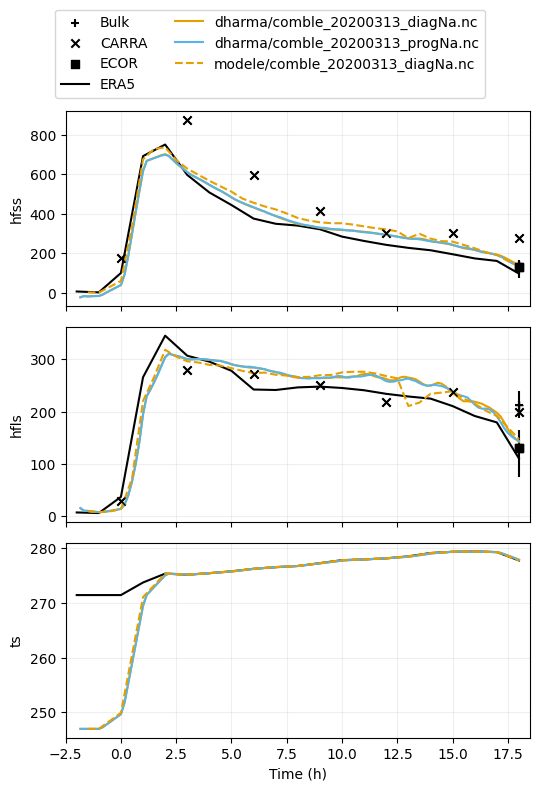

In [15]:
%run functions_plotting.py 

## plot variables that have only time dependence
#plot_1d(pd.concat([df_col_1d,era5_1d,carra_dat,srfflux_dat]),var_vec_1d)dependence
plot_1d(pd.concat([df_col_1d_les,df_col_1d_scm,era5_1d,carra_dat,srfflux_dat]),var_vec_1d)

In [16]:
%run functions_plotting.py 

## load all simulations located in subfolders of the given directory
var_vec_1d = ['lwpr','lwpc','iwp','od'] # variables without ERA5 (shorter time axis)
var_vec_2d_les = ['theta','qv','qlc','qlr','ta','ua','va','qic','qis','qig','ua','va','ta','prf']
var_vec_2d_scm = ['theta','qv','qlc','qlr','ta','ua','va','qicc','qics','qipc','qips','ua','va','ta','prf']
df_col_1d_les,df_col_2d_les = load_sims('../output_les/',var_vec_1d,var_vec_2d_les,t_shift=-2,keyword=sim_keyword,diag_zi_ctt=True)
df_col_1d_scm,df_col_2d_scm = load_sims('../output_scm/',var_vec_1d,var_vec_2d_scm,t_shift=-2,keyword=sim_keyword,diag_zi_ctt=True)

Loading variables: f(time)
../output_les/dharma/comble_20200313_diagNa.nc
../output_les/dharma/comble_20200313_progNa.nc
Loading variables: f(time,height)
../output_les/dharma/comble_20200313_diagNa.nc
../output_les/dharma/comble_20200313_progNa.nc
computing inversion height, cloud-top height, and cloud-top temperature
using liquid(-ice) potential temperature
dharma/comble_20200313_diagNa.nc
dharma/comble_20200313_progNa.nc
Loading variables: f(time)
../output_scm/modele/comble_20200313_diagNa.nc
Loading variables: f(time,height)
../output_scm/modele/comble_20200313_diagNa.nc
computing inversion height, cloud-top height, and cloud-top temperature
modele/comble_20200313_diagNa.nc


/usr/local/other/anaconda/GEOSpyD/24.3.0-0/2024-08-29/envs/py3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


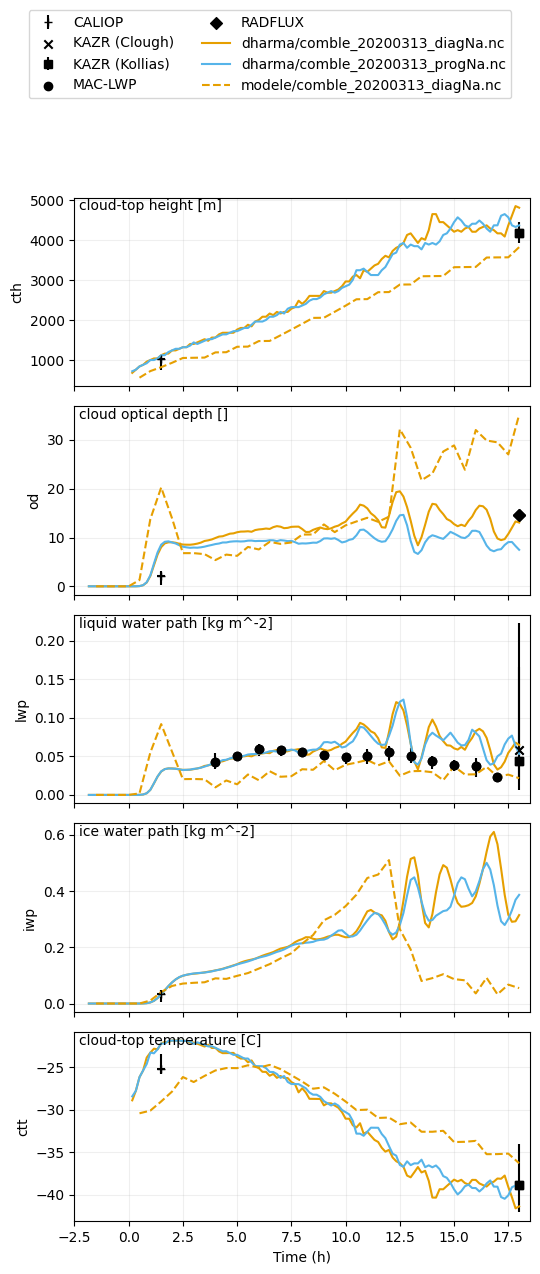

In [17]:
%run functions_plotting.py 
## plot variables that have only time dependence
#plot_1d(pd.concat([df_col_1d,maclwp_dat,modis_dat,viirs_dat,sentinel_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['zi','od','lwp','iwp','ctt'])

#plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['cth','od','lwp','iwp','ctt'],longnames=['cloud-top height','cloud optical depth','liquid water path','ice water path','cloud-top temperature'],units=['m','','kg m^-2','kg m^-2','C'])
plot_1d(pd.concat([df_col_1d_les,df_col_1d_scm,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['cth','od','lwp','iwp','ctt'],longnames=['cloud-top height','cloud optical depth','liquid water path','ice water path','cloud-top temperature'],units=['m','','kg m^-2','kg m^-2','C'])

## plot variables that have only time dependence (for now excluding imager retrievals that are mostly SZA > 70)
#plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,gongiwp_dat,radflux_dat]),['od','lwp','iwp']) #'zi','od','lwp','iwp

Computing wind speed
Computing wind direction
temporal averaging over 1.0 h interval


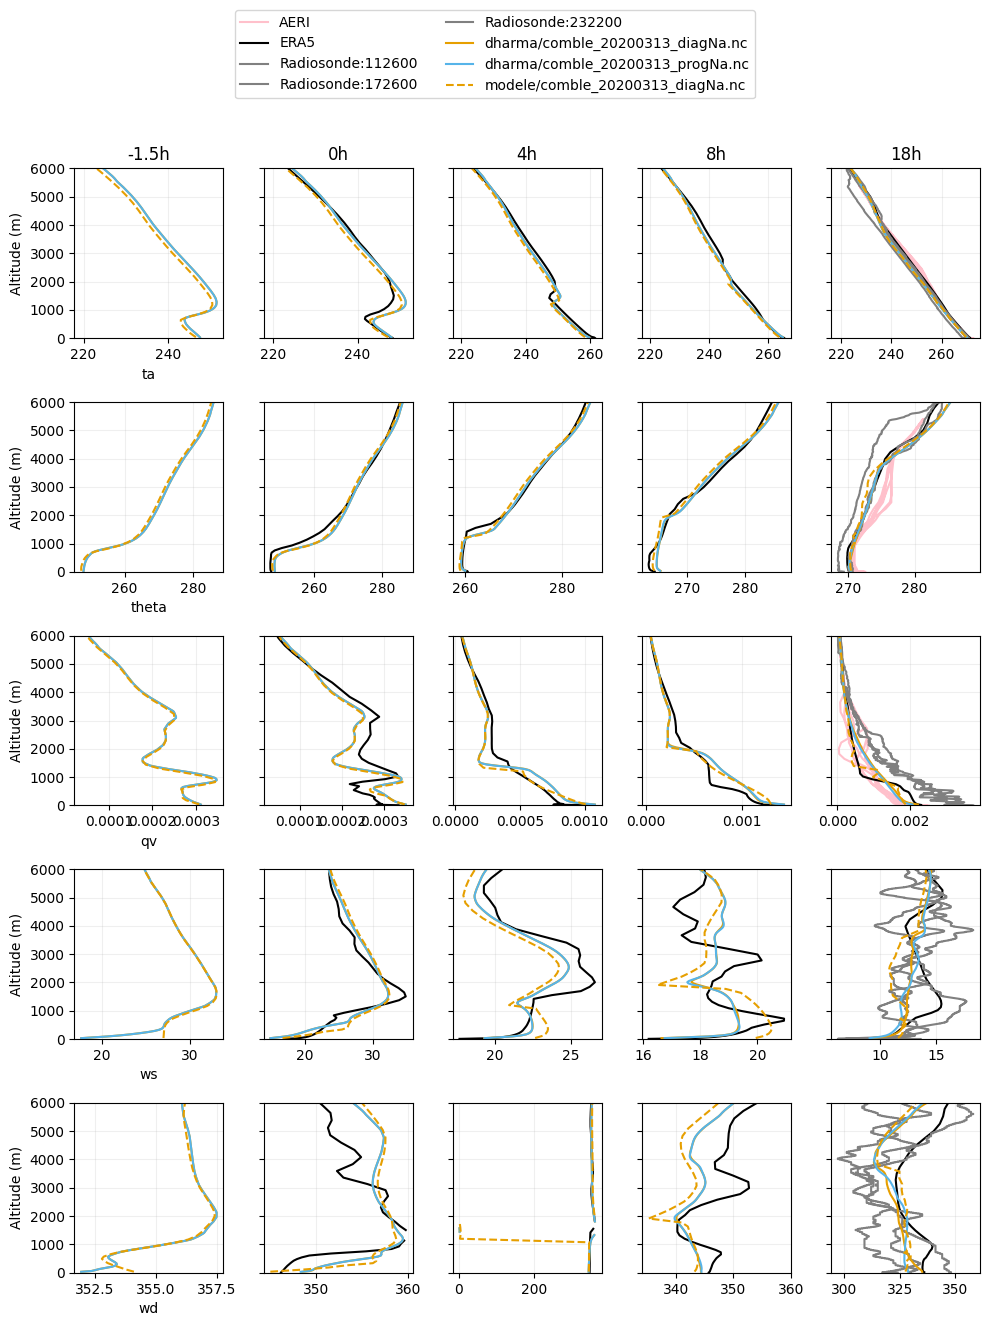

<Figure size 1000x600 with 0 Axes>

In [20]:
%run functions_plotting.py

## plot all variables that have time and height dependence
#plot_2d(df_col_2d,var_vec_2d,[0,3,6,9,12,15,18],z_max=6000)
     
## example where ERA5 and radiosonde are included
#plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat,aeri_dat]),var_vec = ['ta','theta','qv','ws','wd'],times=[-1.5,0,4,8,18],z_max=6000)
plot_2d(pd.concat([df_col_2d_les,df_col_2d_scm,era5_2d,rs_dat,aeri_dat]),var_vec = ['ta','theta','qv','ws','wd'],times=[-1.5,0,4,8,18],z_max=6000)
